In [148]:
#library import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

#---- CNN model build ----
import keras 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [86]:
classifier =  Sequential()

#Convolution layer
classifier.add( Conv2D(filters = 32, kernel_size = 3, 
                       input_shape = (64,64,1), activation = 'relu' ) )
#Max pooling layer
classifier.add( MaxPooling2D(pool_size = 2, strides = 2) )


"""Adding another convolution and maxpooling layers to increase precision
"""
#Convolution layer
classifier.add( Conv2D(filters = 32, kernel_size = 3, 
                       activation = 'relu' ) )
#Max pooling layer
classifier.add( MaxPooling2D(pool_size = 2, strides = 2) )


#Flattening layer
classifier.add( Flatten() )

#Hidden layer
classifier.add( Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu') )

#Output layer
classifier.add( Dense(units = 3, kernel_initializer = 'uniform', activation = 'sigmoid') )


opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
#ANN compile
classifier.compile( optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [88]:
#---- CNN model training ----
#Image import 
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_dataset = train_datagen.flow_from_directory('Dataset/Training/',
                                                    target_size = (64,64),
                                                    color_mode = 'grayscale',
                                                    batch_size = 32,
                                                    classes = ['Tornado', 'CBR', 'Biz'],
                                                    class_mode = 'categorical')
testing_dataset = test_datagen.flow_from_directory('Dataset/Test/',
                                                        target_size = (64,64),
                                                        color_mode = 'grayscale',
                                                        batch_size = 32,
                                                        classes = ['Tornado', 'CBR', 'Biz'],
                                                        class_mode = 'categorical')


Found 2399 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [89]:
classifier.fit_generator(training_dataset,
                        steps_per_epoch = 200,
                        epochs = 3,
                        validation_data = testing_dataset,
                        validation_steps = 200 )

Epoch 1/3
200/200 [==============================] - 97s 484ms/step - loss: 0.5427 - acc: 0.7261 - val_loss: 0.4356 - val_acc: 0.8103
Epoch 2/3
200/200 [==============================] - 94s 471ms/step - loss: 0.3912 - acc: 0.8274 - val_loss: 0.3437 - val_acc: 0.8570
Epoch 3/3
200/200 [==============================] - 97s 483ms/step - loss: 0.3303 - acc: 0.8557 - val_loss: 0.3605 - val_acc: 0.8500


## Validation set prediction and confussion matrix

In [212]:
generator = test_datagen.flow_from_directory('Dataset/validation/',
                                                        target_size = (64,64),
                                                        color_mode = 'grayscale',
                                                        batch_size = 39,
                                                        classes = ['Tornado', 'CBR', 'Biz'], 
                                                        class_mode = None,
                                                        shuffle = False)

probabilities = classifier.predict_generator(generator, 1)

predicted_class_indices=np.argmax(probabilities,axis=1)
labels=(generator.class_indices)
labels2=dict((v,k) for k,v in labels.items())
predictions=[labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print(labels)
print(predictions)

Found 39 images belonging to 3 classes.
[0 0 0 1 1 1 0 0 0 0 2 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 1 1 2 1 2 1
 2 2]
{'Tornado': 0, 'CBR': 1, 'Biz': 2}
['Tornado', 'Tornado', 'Tornado', 'CBR', 'CBR', 'CBR', 'Tornado', 'Tornado', 'Tornado', 'Tornado', 'Biz', 'Tornado', 'Tornado', 'CBR', 'CBR', 'CBR', 'CBR', 'CBR', 'CBR', 'CBR', 'CBR', 'CBR', 'CBR', 'CBR', 'CBR', 'CBR', 'Biz', 'Biz', 'Biz', 'Biz', 'Biz', 'CBR', 'CBR', 'Biz', 'CBR', 'Biz', 'CBR', 'Biz', 'Biz']


Confussion Matrix:

In [213]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(predicted_class_indices, generator.classes))

[[ 9  0  0]
 [ 3 13  4]
 [ 1  0  9]]


Validation Accuracy:

In [217]:
y_test = predicted_class_indices
y_pred = generator.classes

confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Tornado', 'CBR', 'Biz']))

Confusion Matrix

[[ 9  0  0]
 [ 3 13  4]
 [ 1  0  9]]

Accuracy: 0.79

Micro Precision: 0.79
Micro Recall: 0.79
Micro F1-score: 0.79

Macro Precision: 0.79
Macro Recall: 0.85
Macro F1-score: 0.80

Weighted Precision: 0.85
Weighted Recall: 0.79
Weighted F1-score: 0.79

Classification Report

              precision    recall  f1-score   support

     Tornado       0.69      1.00      0.82         9
         CBR       1.00      0.65      0.79        20
         Biz       0.69      0.90      0.78        10

    accuracy                           0.79        39
   macro avg       0.79      0.85      0.80        39
weighted avg       0.85      0.79      0.79        39



# Predictions

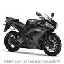

In [219]:
data_image = 'Dataset/validation/CBR/Image1006.jpg'
image = tf.keras.preprocessing.image.load_img(data_image, color_mode= 'grayscale', target_size=(64,64), interpolation= 'nearest')

input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])

image

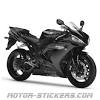

In [220]:
image = tf.keras.preprocessing.image.load_img(data_image, grayscale= True, color_mode= 'rgb', target_size=None, interpolation= 'nearest')
image

In [221]:
predicted_class_indices=classifier.predict_classes(input_arr)
labels=(generator.class_indices)
labels2=dict((v,k) for k,v in labels.items())
predictions=[labels2[k] for k in predicted_class_indices]

print('Predicted Honda Model: ',predictions[0])

Predicted Honda Model:  CBR


In [211]:
final_image = tf.image.resize_image_with_crop_or_pad(input_arr, 64,64)

prediction = classifier.predict_on_batch(x = final_image)
prediction>0.5

predicted_class_indices=np.argmax(prediction,axis=1)
labels=(generator.class_indices)
labels2=dict((v,k) for k,v in labels.items())
predictions=[labels2[k] for k in predicted_class_indices]

predictions

['Tornado']

### Model saving

In [172]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 387       
Total para

In [170]:
classifier.save('honda_classifier.H5')